In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

In [3]:
def norm(df, col):
    max_v = df[col].max()
    min_v = df[col].min()
    df[col] = df[col].apply(lambda value: (value - min_v) / (max_v - min_v))

def T_star(x, p):
    def T(x, p):
        if p == 0:
            return 1
        elif p == 1:
            return x
        elif p == 2:
            return 2*x*x - 1
        elif p == 3:
            return 4*(x**3) - 3*x
        elif p == 4:
            return 8*(x**4)-8*(x**2) + 1
        elif p == 5:
            return 6*(x**5) - 20*(x**3) + 5*x
        else:
            return 2*x*T(x,p-1) - T(x, p-2)
    
    if p == 0:
        return 0.5
    return T(2*x-1, p)

def Psi(Lambda, x):
    m = x.shape[1]
    res = np.zeros([q0, m])
    for i in range(q0):
        for j in range(m):
            suma = 0.0
            for p in range(Lambda.shape[1]):
                suma += Lambda[j, p] * T_star(x[i, j], p)
            res[i, j] = suma
    return res

def calc_A(psi, y):
    A1_temp, re, d, s = np.linalg.lstsq(psi, y)
    A1 = A1_temp.T
    return A1

def calc_c(a1, a2, a3, psi1, psi2, psi3, y, index):
    matrix1 = calc_Fi(a1, psi1, index)
    matrix2 = calc_Fi(a2, psi2, index)
    matrix3 = calc_Fi(a3, psi3, index)

    matrix = np.concatenate((matrix1, matrix2, matrix3), axis=0).T
    y_c = y[['y'+str(index+1)]].to_numpy()
    x, residuals, r, s = np.linalg.lstsq(matrix, y_c)
    return x

def calc_Fi(a, psi, index):
    return np.array([np.sum(a[index]*psi, axis=1)])

In [4]:
sample = pd.read_csv('vybirka_2.csv')
sample

,q0,x11,x12,x21,x22,x31,x32,x33,y1,y2,y3,y4
0,1,6.050,12.015,1.050,9.015,10.00,1.00,6.10,254.621,58.145,119.406,117.683
1,2,8.150,10.100,1.150,9.109,15.80,2.10,4.20,298.163,73.368,92.651,90.123
2,3,10.200,8.125,1.192,9.125,22.50,2.50,3.50,387.411,71.084,87.691,83.576
3,4,12.250,6.175,2.250,9.175,25.70,3.51,2.72,467.197,83.567,78.793,74.789
4,5,14.325,5.200,4.325,9.198,32.50,4.20,2.53,566.547,93.813,79.497,54.316
5,6,16.350,4.250,6.350,9.251,35.00,5.02,2.10,653.789,101.378,77.082,32.817
6,7,18.490,3.400,8.411,9.495,40.70,8.20,1.15,710.926,155.579,67.758,57.425
7,8,20.698,2.500,10.505,10.498,51.80,10.10,0.72,851.381,160.432,71.956,89.519
8,9,22.900,2.700,12.610,11.598,65.00,12.80,0.54,987.364,176.283,91.123,121.374
9,10,18.450,3.700,14.695,13.699,82.00,14.40,0.15,1036.123,193.657,112.859,249.173


In [5]:
norm_sample = sample.copy()
for col in norm_sample.columns[1:]:
    norm(norm_sample, col)
norm_sample.head()

,q0,x11,x12,x21,x22,x31,x32,x33,y1,y2,y3,y4
0,1,0.106101,0.474088,0.000000,0.295217,0.060837,0.000000,0.338260,0.000059,0.046330,0.179223,0.096078
1,2,0.217507,0.382198,0.005319,0.298729,0.107884,0.035995,0.230244,0.000089,0.060530,0.093524,0.064877
2,3,0.326260,0.287428,0.007553,0.299327,0.162232,0.049084,0.190449,0.000149,0.058399,0.077637,0.057465
3,4,0.435013,0.193858,0.063830,0.301196,0.188189,0.082134,0.146106,0.000204,0.070043,0.049135,0.047517
4,5,0.545093,0.147073,0.174202,0.302055,0.243348,0.104712,0.135304,0.000271,0.079600,0.051390,0.024339


In [6]:
p1 = 3
p2 = 3
p3 = 3

n1 = 2
n2 = 2
n3 = 3
q0 = 45

In [7]:
y = norm_sample[['y1', 'y2', 'y3', 'y4']]
y.head()

,y1,y2,y3,y4
0,0.000059,0.046330,0.179223,0.096078
1,0.000089,0.060530,0.093524,0.064877
2,0.000149,0.058399,0.077637,0.057465
3,0.000204,0.070043,0.049135,0.047517
4,0.000271,0.079600,0.051390,0.024339


In [8]:
m = n1*(p1+1) + n2*(p2+1) + n3*(p3+1) #к-ть доданків, які будуть в цільовій ф-ції
print(m)
matrix = np.zeros((q0, m))
print(matrix)

temp = pd.DataFrame()
j = 0
for i in range(1, n1+1):
    for p in range(0, p1+1):
        temp.insert(j, f'T_{p}(x1{i}', norm_sample[f'x1{i}'].map(lambda x: T_star(x, p)))
        j+=1

for i in range(1, n2+1):
    for p in range(0, p2+1):
        temp.insert(j, f'T_{p}(x2{i}', norm_sample[f'x2{i}'].map(lambda x: T_star(x, p)))
        j+=1

for i in range(1, n3+1):
    for p in range(0, p3+1):
        temp.insert(j, f'T_{p}(x3{i}', norm_sample[f'x3{i}'].map(lambda x: T_star(x, p)))
        j+=1

biq0 = norm_sample[['y1', 'y2', 'y3','y4']].sum(axis=1)
biq0T = np.array([biq0.to_numpy()]).T
x, residuals, r, s = np.linalg.lstsq(temp, biq0T)

28
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [9]:
L = x.T[0]
cols = temp.columns
end1 = n1*(p1+1)
end2 = end1 + n2*(p2+1)
lambda1_f = x[:n1*(p1+1)].T[0]
temp.loc[:, cols[:n1*(p1+1)]] *= lambda1_f
lambda1 = np.reshape(x[:n1*(p1+1)], (n1, p1+1))
lambda2_f = x[end1:end2].T[0]
lambda2 = np.reshape(x[end1:end2], (n2, p2+1))
temp.loc[:, cols[end1:end2]] *= lambda2_f
lambda3_f = x[end2:].T[0]
lambda3 = np.reshape(x[end2:], (n3, p3+1))
temp.loc[:, cols[end2:]] *= lambda3_f

In [10]:
print(f"lambda_1 \n{lambda1}\n")
print(f"lambda_2 \n{lambda2}\n")
print(f"lambda_3 \n{lambda3}")

lambda_1 
[[ 0.34057473 -0.15116364  0.02015314 -0.03154156]
 [ 0.34057473  0.08164588 -0.01843053  0.04302413]]

lambda_2 
[[ 0.34057473  0.14525319 -0.09390869  0.07128801]
 [ 0.34057473  0.43244903 -0.0331006   0.09652147]]

lambda_3 
[[ 0.34057473  0.18508986 -0.17320644  0.03533362]
 [ 0.34057473  1.05217715  0.19601865 -0.36328438]
 [ 0.34057473 -0.02679    -0.14959296  0.07251579]]


In [11]:
df_psi = pd.DataFrame()
j = 0
for i in range(1, n1+1):
    init = temp[f'T_{0}(x1{i}']
    for p in range(1, p1+1):
        init = init.add(temp[f'T_{p}(x1{i}'])
    df_psi.insert(j, f'psi_x1{i}', init)
    j+=1

for i in range(1, n2+1):
    init = temp[f'T_{0}(x2{i}']
    for p in range(1, p2+1):
        init = init.add(temp[f'T_{p}(x2{i}'])
    df_psi.insert(j, f'psi_x2{i}', init)
    j+=1

for i in range(1, n3+1):
    init = temp[f'T_{0}(x3{i}']
    for p in range(1, p3+1):
        init = init.add(temp[f'T_{p}(x3{i}'])
    df_psi.insert(j, f'psi_x3{i}', init)
    j+=1
df_psi.head()

,psi_x11,psi_x12,psi_x21,psi_x22,psi_x31,psi_x32,psi_x33
0,0.281377,0.191053,-0.140163,0.107237,-0.088981,-0.322587,0.357794
1,0.217698,0.195595,-0.127913,0.109960,0.000252,-0.514578,0.319068
2,0.179940,0.188994,-0.122839,0.110419,0.088411,-0.572818,0.287646
3,0.158441,0.164434,-0.008170,0.111841,0.125174,-0.693857,0.240088
4,0.145271,0.143306,0.150272,0.112490,0.192510,-0.756120,0.226370


In [12]:
psi_1n = [f'psi_x1{i}' for i in range(1, n1+1)]
a1, res, r, s = np.linalg.lstsq(df_psi[psi_1n], y)
a1 = a1.T
psi_2n = [f'psi_x2{i}' for i in range(1, n2+1)]
a2, res, r, s = np.linalg.lstsq(df_psi[psi_2n], y)
a2 = a2.T
psi_3n = [f'psi_x3{i}' for i in range(1, n3+1)]
a3, res, r, s = np.linalg.lstsq(df_psi[psi_3n], y)
a3 = a3.T

print(f"a_1 \n{a1}\n")
print(f"a_2 \n{a2}\n")
print(f"a_3 \n{a3}")

a_1 
[[-0.24789772  0.40166312]
 [ 0.67233315  0.79725218]
 [-0.0373063   2.31089615]
 [-0.8448203   2.9299022 ]]

a_2 
[[0.09847873 0.02612812]
 [0.78412336 0.51127278]
 [0.98834111 0.80018567]
 [1.04331964 0.82611134]]

a_3 
[[ 0.04791384 -0.03237142  0.09894366]
 [ 0.36597103  0.34839465  0.8906974 ]
 [ 0.93742999  0.57848891  0.99492465]
 [ 1.33849718  0.41490718  0.68686422]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond

In [13]:
df_psi1 = df_psi[psi_1n].copy()
df_psi2 = df_psi[psi_2n].copy()
df_psi3 = df_psi[psi_3n].copy()

df_psi1.head()

,psi_x11,psi_x12
0,0.281377,0.191053
1,0.217698,0.195595
2,0.179940,0.188994
3,0.158441,0.164434
4,0.145271,0.143306


In [14]:
f1 = (df_psi1 * a1[0]).sum(axis=1)
f2 = (df_psi2 * a2[1]).sum(axis=1)
f3 = (df_psi3 * a3[2]).sum(axis=1)
df_f = pd.DataFrame()
df_f.insert(0, 'f1', f1)
df_f.insert(1, 'f2', f2)
df_f.insert(2, 'f3', f3)

In [15]:
def calc_dfc(a1, a2, a3, df_psi1, df_psi2, df_psi3, y, index):
    res = pd.DataFrame()
    res.insert(0, 'f1i', (df_psi1 * a1[index]).sum(axis=1))
    res.insert(1, 'f2i', (df_psi2 * a2[index]).sum(axis=1))
    res.insert(2, 'f3i', (df_psi3 * a3[index]).sum(axis=1))
    x, res, r, s = np.linalg.lstsq(res, y[f'y{index+1}'])
    return x

arr = np.array([calc_dfc(a1, a2, a3, df_psi1, df_psi2, df_psi3, y, index) for index in range(4)])

print(f"Matrix C \n{arr}\n")

for i in range(len(arr)):
    s = f"Ф{i+1}(x1,x2,x3) = "
    for j in range(len(arr[i])):
        s += f"({arr[i, j]})*Ф{i+1}{j+1}(x{j+1})"
        if(j != len(arr[i]) - 1):
            s+= " + "
    print(s)

Matrix C 
[[ 0.40557523 -0.33912355  0.97339751]
 [-0.10518871  0.30672635  0.92185301]
 [ 0.11228911  0.06266933  0.89734863]
 [-0.07946138  0.15673501  0.94153238]]

Ф1(x1,x2,x3) = (0.40557523452639976)*Ф11(x1) + (-0.3391235486844573)*Ф12(x2) + (0.9733975079024278)*Ф13(x3)
Ф2(x1,x2,x3) = (-0.10518871370551189)*Ф21(x1) + (0.306726348208929)*Ф22(x2) + (0.9218530056754638)*Ф23(x3)
Ф3(x1,x2,x3) = (0.11228910513524697)*Ф31(x1) + (0.06266932805079355)*Ф32(x2) + (0.8973486326843622)*Ф33(x3)
Ф4(x1,x2,x3) = (-0.07946137949533649)*Ф41(x1) + (0.15673500649759414)*Ф42(x2) + (0.9415323841679621)*Ф43(x3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


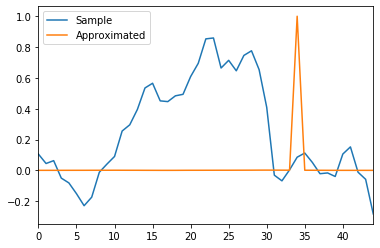

Max_error_Y1: 0.9146888509786445 


In [16]:
t = pd.DataFrame({f'{i}': (df_f * arr[i]).sum(axis=1) for i in range(4)})
t['0'].plot.line(label='Sample')
y['y1'].plot.line(label='Approximated')
plt.legend(loc='upper left')
plt.show()

r = (t['0'] - y['y1']).apply(abs)
print(f"Max_error_Y1: {r.max()} ")

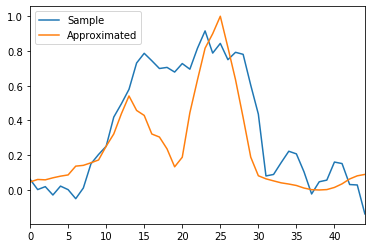

Max_error_Y2: 0.5454145377183017


In [17]:
t['1'].plot.line(label='Sample')
y['y2'].plot.line(label='Approximated')
plt.legend(loc='upper left')
plt.show()

r = (t['1'] - y['y2']).apply(abs)
print(f"Max_error_Y2: {r.max()}")

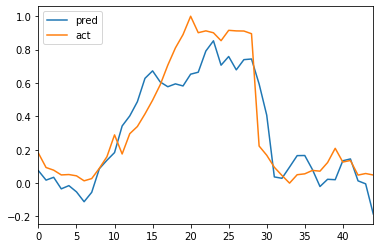

Max_error_Y3: 0.3718543237726935


In [18]:
t['2'].plot.line(label='pred')
y['y3'].plot.line(label='act')
plt.legend(loc='upper left')
plt.show()

r = (t['2'] - y['y3']).apply(abs)
print(f"Max_error_Y3: {r.max()}")

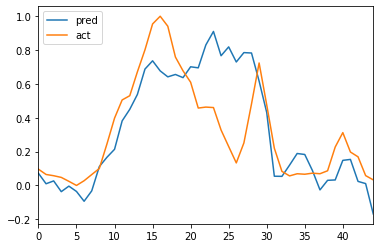

Max_error_Y4: 0.5964416896236951


In [19]:
t['3'].plot.line(label='pred')
y['y4'].plot.line(label='act')
plt.legend(loc='upper left')
plt.show()

r = (t['3'] - y['y4']).apply(abs)
print(f"Max_error_Y4: {r.max()}")

In [22]:
x1 = norm_sample[['x11', 'x12']].to_numpy()
x2 = norm_sample[['x21', 'x22']].to_numpy()
x3 = norm_sample[['x31', 'x32', 'x33']].to_numpy()